In [16]:
from googlemaps import Client as GoogleMaps
from geopy.geocoders import Nominatim
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

df1 = pd.read_csv("2023-12-18_RAW(FloridaREData).csv")

df1.drop(['Folders','Vortex ID','Lead Status', 'Remarks', 'Agent Remarks', 'Name 3', 'Name 4', 'Name 5', 'Name 6', 'Name 7', 'Name 8', 'Name 9', 'MLS Name 3', 'MLS Name 4', 'MLS Name 5'], axis=1, inplace=True)


mail_counter_median = df1['Mail Counter'].median()

df1['Mail Counter'].fillna(mail_counter_median, inplace=True)

missing_tax_id_count = df1['Tax ID'].isnull().sum()

new_tax_ids = ['1+' + str(i) for i in range(1, missing_tax_id_count + 1)]

df1.loc[df1['Tax ID'].isnull(), 'Tax ID'] = new_tax_ids
df1.set_index('Tax ID', inplace=True)



# # Applying the formatting to the 'List Price' column
# df1['List Price'] = df1['List Price'].apply(format_dollars)
# Example: When visualizing or displaying 'List Price'
print(df1['List Price'].apply(format_dollars).head())

# descriptive statistics 
df1.describe()


Tax ID
A04B037D                    $899,900.00
0711317024002100120         $368,000.00
6287304                       $3,200.00
182618001000Z000210       $1,199,999.00
U2828191KW000002002010      $205,100.00
Name: List Price, dtype: object


,Property Zip,Mailing Zip,List Price,Days On Market,Bedrooms,Bathrooms,Square Footage,Year Built,Phone Counter,Email Counter,Mail Counter
count,4317.000000,4317.000000,4.317000e+03,1903.000000,3732.000000,3734.000000,3790.000000,3872.000000,4316.0,4316.0,4317.0
mean,32943.445217,34612.125782,4.361439e+05,132.789280,4.343248,3.133503,2104.577441,1987.551653,0.0,0.0,0.0
std,2185.952932,12128.197870,8.666252e+05,100.415662,69.869859,49.911040,4635.187863,24.436029,0.0,0.0,0.0
min,646.000000,646.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1800.000000,0.0,0.0,0.0
25%,32778.000000,32712.000000,2.069000e+05,60.000000,3.000000,2.000000,1200.000000,1973.000000,0.0,0.0,0.0
50%,33584.000000,33579.000000,3.430000e+05,111.000000,3.000000,2.000000,1570.000000,1990.000000,0.0,0.0,0.0
75%,33634.000000,33634.000000,4.680000e+05,182.000000,4.000000,3.000000,2179.750000,2006.000000,0.0,0.0,0.0
max,35983.000000,99350.000000,2.630000e+07,539.000000,4271.000000,3051.000000,155215.000000,2024.000000,0.0,0.0,0.0


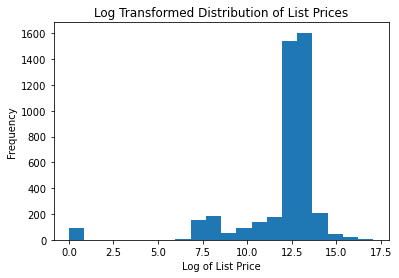

In [17]:
# Apply log transformation
df1['Log List Price'] = np.log(df1['List Price'] + 1)  # Adding 1 to avoid log(0)

# Plotting the log-transformed data
plt.hist(df1['Log List Price'], bins=20)
plt.title('Log Transformed Distribution of List Prices')
plt.xlabel('Log of List Price')
plt.ylabel('Frequency')
plt.show()





# # Histogram with formatted labels
# plt.hist(df1['List Price'], bins=20)
# plt.title('Distribution of List Prices')
# plt.xlabel('List Price')
# plt.ylabel('Frequency')

# # Format x-axis labels as dollar values
# plt.gca().get_xaxis().set_major_formatter(
#     plt.FuncFormatter(lambda x, _: format_dollars(x))
# )
# plt.show()


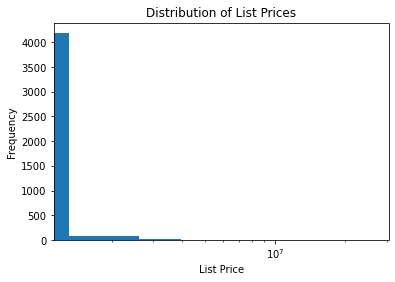

In [18]:
plt.hist(df1['List Price'], bins=20)
plt.title('Distribution of List Prices')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.show()




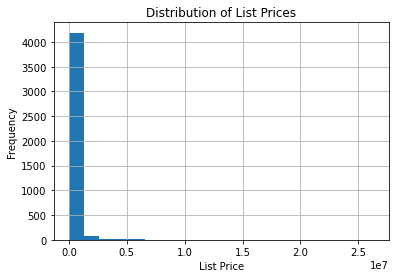

In [19]:
df1['List Price'].hist(bins=20)
plt.title('Distribution of List Prices')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.show()

In [20]:




# Identify numeric columns
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns and correct non-numeric values
for col in numeric_cols:
    # Convert to numeric and coerce errors to NaN
    df1[col] = pd.to_numeric(df1[col], errors='coerce')





# Initialize Google Maps
gmaps = GoogleMaps('your API Key')

# Your list of zip codes
zip_codes = [32137, 33709, 30294, 33843, 32835, 32656, 32825, 32821, 32837, 32764, 33755, 33578,
             33594, 33547, 969, 34210, 30180, 646, 33545, 34786, 34744, 30115, 30360, 33765,
             34746, 33565, 33570, 34234, 34695, 34208, 30040, 32605, 34491, 34747, 34602, 33706,
             33947, 34637, 30075, 30168, 34219, 33786, 32162, 34275, 34209, 33981, 30019, 33803,
             30173, 33572, 30143, 34606, 34291, 30338, 34205, 30663, 32720, 33897, 33613, 33607,
             34761, 32141, 32763, 30153, 30009, 34431, 33953, 34482, 34684, 33602, 32771, 33513,
             30044, 30577, 34481, 34689, 33872, 33823, 30318, 30655, 33898, 33543, 34286, 30135,
             33610, 33579, 33844, 30144, 32080, 34293, 30038, 30560, 32615, 33612, 30909, 33615,
             30043, 34288, 30549, 30296, 33781, 33558, 33614, 33647, 33592, 32949, 30236, 30004,
             30141, 30248, 32145, 34677, 33605, 33511, 33870, 33852, 33624, 32826, 34212, 34787,
             34236, 32641, 33950, 33548, 32174, 30012, 30114, 32134, 34607, 34480, 34221, 32766,
             34217, 33980, 33619, 32810, 33935, 33634, 34753, 33909, 33563, 34222, 33584, 33618,
             33711, 34711, 34442, 32806, 30542, 33896, 30317, 30311, 30134, 30014, 33952, 34974,
             30326, 33544, 33954, 30058, 30312, 30309, 30107, 32736, 33876, 34758, 30076, 34668,
             32746, 30291, 791, 30736, 32608, 30062, 30233, 30178, 33983, 32712, 30354, 34207,
             33772, 30345, 33921, 34788, 30519, 34285, 33715, 30011, 32804, 32701, 30189, 30534,
             34231, 30066, 32819, 32038, 33510, 30013, 32773, 30064, 34691, 33625, 30315, 32609,
             34698, 34473, 32177, 33596, 30313, 34474, 30030, 32653, 32136, 30558, 34465, 32725,
             30536, 30045, 30028, 30046, 33705, 30504, 33135, 34453, 30344, 30540, 32751, 30132,
             30518, 30017, 33707, 32750, 30273, 30127, 34240, 33853, 33903, 34242]

# Fetch lat-long data
lat_long = {}
for zip_code in zip_codes:
    geocode_result = gmaps.geocode(f"{zip_code}, USA")
    if geocode_result:
        location = geocode_result[0]['geometry']['location']
        lat_long[zip_code] = (location['lat'], location['lng'])

# Convert to DataFrame
location_df = pd.DataFrame.from_dict(lat_long, orient='index', columns=['Latitude', 'Longitude'])
print(location_df)
location_df.info






        Latitude  Longitude
32137  29.625068 -81.218835
33709  27.821958 -82.740109
30294  33.629985 -84.259486
33843  27.733328 -81.493799
32835  28.510787 -81.482820
...          ...        ...
30127  33.882246 -84.668835
34240  27.327532 -82.334337
33853  27.907758 -81.587060
33903  26.677175 -81.893448
34242  27.275276 -82.556456

[237 rows x 2 columns]


<bound method DataFrame.info of         Latitude  Longitude
32137  29.625068 -81.218835
33709  27.821958 -82.740109
30294  33.629985 -84.259486
33843  27.733328 -81.493799
32835  28.510787 -81.482820
...          ...        ...
30127  33.882246 -84.668835
34240  27.327532 -82.334337
33853  27.907758 -81.587060
33903  26.677175 -81.893448
34242  27.275276 -82.556456

[237 rows x 2 columns]>

In [23]:
# Save the cleaned data
df1.to_csv('path_to_your_cleaned_file.csv', index=False)



# Calculate correlation matrix
correlation_matrix = df1.corr()

# Display the correlation with the sales price column
list_price_correlation = correlation_matrix['List Price']
print(list_price_correlation.sort_values(ascending=False))


List Price        1.000000
Log List Price    0.328778
Square Footage    0.238909
Days On Market    0.069433
Year Built        0.067266
Bathrooms         0.017584
Bedrooms          0.012963
Property Zip     -0.021168
Mailing Zip      -0.026491
Phone Counter          NaN
Email Counter          NaN
Mail Counter           NaN
Name: List Price, dtype: float64


In [ ]:
df1.isnull().sum()

In [ ]:
df1[''].fillna(df1['column_name'].mean(), inplace=True)  # Example of filling missing values with the mean

In [ ]:
# Display the first few rows of the DataFrame
print(location_df.head())
# Check the number of unique entries
print("Number of unique zip codes:", len(location_df))
